In [1]:
import pandas as pd
import numpy as np

In [2]:
elon=pd.read_csv("Elon_musk.csv", encoding="cp1252")

In [3]:
elon.head(2)

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...


In [4]:
elon.drop(columns="Unnamed: 0", inplace=True)

In [5]:
import re #regular expression
import string


In [6]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
elon["Text"]=elon["Text"].apply(clean)

In [23]:
elon.head()

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...


In [8]:
#Word frequency
freq = pd.Series(' '.join(elon['Text']).split()).value_counts()
freq

the         487
to          400
a           356
is          355
of          315
           ... 
nyquil        1
musk          1
negati        1
carousel      1
altho         1
Length: 4605, dtype: int64

In [9]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
from nltk import tokenize

#removing stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
stop = stopwords.words('english')
elon['Text'] = elon['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [11]:
elon

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make sure read ur terms amp condition...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [12]:
freq_Sw = pd.Series(' '.join(elon['Text']).split()).value_counts()
freq_Sw

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
                 ... 
nyquil              1
musk                1
negati              1
carousel            1
altho               1
Length: 4482, dtype: int64

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(elon["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
word_freq_df

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
...,...,...,...
4458,zshauladventure,1,0.000076
4459,zubinanary,1,0.000076
4460,zwiebelbach,1,0.000076
4461,zzcool,1,0.000076


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(elon["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
df2

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [18]:
top2_words = get_top_n2_words(elon["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["tri-gram", "Freq"]
top2_df.head()

,tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


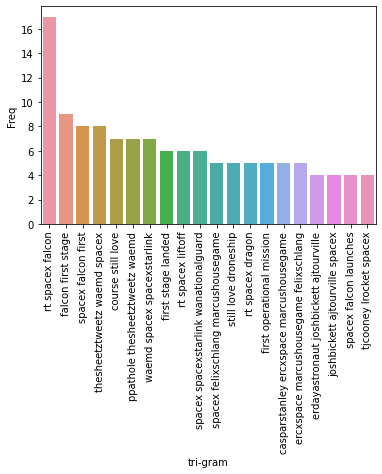

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=top2_df["tri-gram"][:20],y=top2_df["Freq"][:20])
plt.xticks(rotation=90);

In [20]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


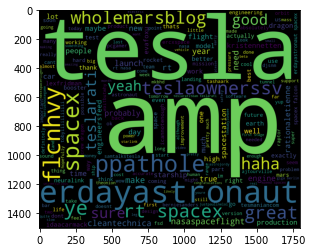

In [21]:
string_Total = " ".join(elon["Text"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [22]:
!pip install afinn
from afinn import Afinn
afinn=Afinn(language='en')#setting language to english

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 986 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=8f1d6d05e12e6c4826a20d2595d22eea21c6d86823c6cbf564881086b5e326bb
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [24]:
elon["afinn_score"]= elon["Text"].apply(afinn.score)#to calculate the sentiment total score of each documents in text.
elon

,Text,afinn_score
0,im alien,0.0
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0
2,joerogan spotify great interview,3.0
3,doge underestimated,-1.0
4,teslacn congratulations tesla china amazing ex...,6.0
...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0
1995,ppathole make sure read ur terms amp condition...,1.0
1996,teslagong ppathole samwise gamgee,0.0
1997,ppathole altho dumb dumber,-3.0


In [25]:
#for word counting to further generalize afinn_score
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [26]:
elon['word_count'] = elon['Text'].apply(word_count)


In [27]:
elon['afinn_adjusted_score'] = elon['afinn_score'] / elon['word_count'] * 100
elon

,Text,afinn_score,word_count,afinn_adjusted_score
0,im alien,0.0,2,0.000000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0,7,0.000000
2,joerogan spotify great interview,3.0,4,75.000000
3,doge underestimated,-1.0,2,-50.000000
4,teslacn congratulations tesla china amazing ex...,6.0,10,60.000000
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0,11,-9.090909
1995,ppathole make sure read ur terms amp condition...,1.0,10,10.000000
1996,teslagong ppathole samwise gamgee,0.0,4,0.000000
1997,ppathole altho dumb dumber,-3.0,4,-75.000000


In [28]:
elon.describe()

,afinn_score,word_count,afinn_adjusted_score
count,1999.000000,1999.000000,1974.000000
mean,0.812906,6.653827,15.285004
std,1.874707,4.030691,37.256796
min,-7.000000,0.000000,-300.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,6.000000,0.000000
75%,2.000000,10.000000,27.272727
max,12.000000,20.000000,200.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


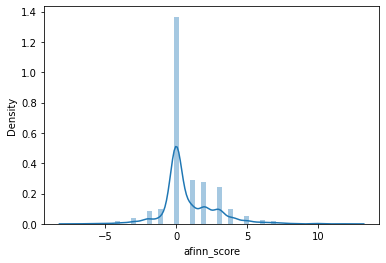

In [30]:
import seaborn as sns
sns.distplot(elon["afinn_score"])

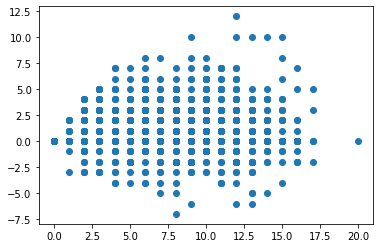

In [31]:
plt.scatter(y='afinn_score', x='word_count',data=elon)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


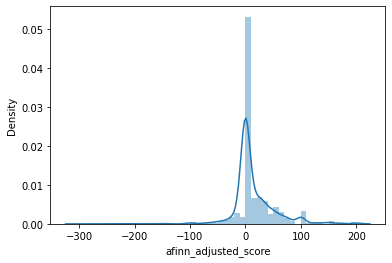

In [33]:
sns.distplot(elon["afinn_adjusted_score"]);

In [34]:
#As we can see plot is positively skewed we can say that sentimental of most tweet are +ve (good) in nature